<a href="https://colab.research.google.com/github/EdwinGuzmanSV/ProyectoFinalR_Edwin_Guzman_EFX/blob/main/Proyecto_Final_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Url dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


Presentado por: Edwin Guzman, edwin.guzman@equifax.com

La base de datos incluye las notas de los tres examenes sobre matematicas, lectura y escritura para un grupo de estudiantes. Ademas de ello se cuenta con la informacion educacional de los padres. Con ayuda de estos datos se realiza un analisis exploratorio donde se busca entender la relacion entre las variables desde el redimiento del estudiante vs la formacion academica de los padres.



In [ ]:
Para ejecutar codigo R en Collab:

%load_ext rpy2.ipython

In [ ]:
%%R
library(tidyverse)

Instalacion de las librerias a utilizar:

In [ ]:
%%R
install.packages("ggplot2")
install.packages("corrplot")
install.packages("plyr")
install.packages("plotrix")

Cargando nuestro set de datos y asociando a cada variable para conocer los 6 tipos de nivel academico al cual se encuentran los padres:


In [14]:
%%R
datos<-read.csv("sample_data/StudentsPerformance.csv")
colnames(datos)<-c("gender","race","education", "lunch", "testprep", "math","reading", "writing")

datos1 <- datos[datos$education=="associate's degree",]
datos2 <- datos[datos$education=="bachelor's degree",]
datos3 <- datos[datos$education=="high school",]
datos4 <- datos[datos$education=="master's degree",]
datos5 <- datos[datos$education=="some college",]
datos6 <- datos[datos$education=="some high school",]

Realizamos un vistazo de la data:

In [16]:
%%R
head(datos)

  gender    race          education        lunch  testprep math reading writing
1 female group B  bachelor's degree     standard      none   72      72      74
2 female group C       some college     standard completed   69      90      88
3 female group B    master's degree     standard      none   90      95      93
4   male group A associate's degree free/reduced      none   47      57      44
5   male group C       some college     standard      none   76      78      75
6 female group B associate's degree     standard      none   71      83      78


Vemos la cabecera del set de datos:

In [18]:
%%R
names(datos)

[1] "gender"    "race"      "education" "lunch"     "testprep"  "math"     
[7] "reading"   "writing"  


Con **summary** podemos conocer un resumen util sobre las variables tanto numericas como alfanumericas en relacion a sus maximos, minimos, medias, etc. Para este caso nos apoyamos de la variable datos1 la cual contine los estudiantes con padres que cuentan con Grado de Asociado.



In [19]:
%%R
summary(datos1) 

    gender              race            education            lunch          
 Length:222         Length:222         Length:222         Length:222        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   testprep              math           reading          writing     
 Length:222         Min.   : 26.00   Min.   : 31.00   Min.   : 35.0  
 Class :character   1st Qu.: 57.00   1st Qu.: 61.00   1st Qu.: 58.0  
 Mode  :character   Median : 67.00   Median : 72.50   Median : 70.5  
                    Mean   : 67.88   Mean   : 70.93   Mean   : 69.9  
                    3rd Qu.: 80.00   3rd Qu.: 81.00   3rd Qu.: 80.0  
                    Max.   :100.00   Max.

Algunas observaciones: Los estudiantes cuyos padres poseen un Grado de Asociado la media y mediana mas baja le pertence a este grupo en relacion a los demas grupo. Cabe aclarar que dicho analisis de las demas variables no se coloco aca para no saturar mucho el cuaderno.


Desviacion de las variables numericas de acuerdo al nivel de educacion de los padres:

In [20]:
%%R
sd1=c(sd(datos1[,6]),sd(datos1[,7]),sd(datos1[,8]))
sd2=c(sd(datos2[,6]),sd(datos2[,7]),sd(datos2[,8]))
sd3=c(sd(datos3[,6]),sd(datos3[,7]),sd(datos3[,8]))
sd4=c(sd(datos4[,6]),sd(datos4[,7]),sd(datos4[,8]))
sd5=c(sd(datos5[,6]),sd(datos5[,7]),sd(datos5[,8]))
sd6=c(sd(datos6[,6]),sd(datos6[,7]),sd(datos6[,8]))

notas=c("Notas de matemática", "Notas de Lectura", "Notas de escritura")
datosd= data.frame(notas,sd1,sd2,sd3,sd4,sd5,sd6)
colnames(datosd)=c("                  ","  SDAD  ","  SDBD  ", "  SDHS  ", "  SDMD  ", "  SDSC  ", "  SDSH  ") 
datosd

                        SDAD     SDBD     SDHS     SDMD     SDSC     SDSH  
1 Notas de matemática 15.11209 14.94379 14.53965 15.15392 14.31290 15.92799
2    Notas de Lectura 13.86895 14.28525 14.13213 13.77516 14.05705 15.47929
3  Notas de escritura 14.31112 14.72826 14.08591 13.73071 15.01233 15.73620


Se puede concluir los estudiantes cuyos padres poseen 'Algo de escuela' sus notas se encuentran mas alejada de la media en todas las asignaturas en contraste con los hijos de padres que tienen 'Algo de estudios superiores'.

In [25]:
%%R
datos1 <- datos[datos$education=="associate's degree",]
head(datos1)

   gender    race          education        lunch  testprep math reading
4    male group A associate's degree free/reduced      none   47      57
6  female group B associate's degree     standard      none   71      83
11   male group C associate's degree     standard      none   58      54
12   male group D associate's degree     standard      none   40      52
20 female group C associate's degree free/reduced      none   54      58
36   male group E associate's degree     standard completed   81      81
   writing
4       44
6       78
11      52
12      43
20      61
36      79


Diagrama de Dispercion de todas las asignaturas de acuerdo a su nivel de estudio:

Conclusiones sobre los diagramas de dispercion: Se puede observar un patron en el cual hay una correlacion positiva entre las notas de lectura y escritura  y tambien entre matematicas y demas asignaturas. Que significa esto?, pues que los estudiantes sacan mejores notas en matematicas y escritura son aquellos que logran las mejores notas en lectura.


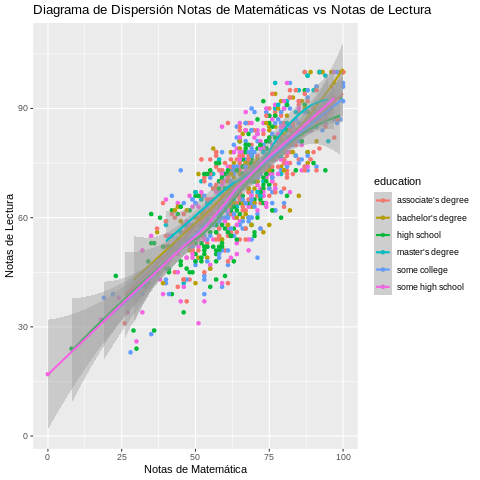

In [26]:
%%R
mdd1=ggplot(datos, aes(math,reading, color=education)) +geom_point() + stat_smooth(method = "loess", formula = y ~ x)+ labs(title="Diagrama de Dispersión Notas de Matemáticas vs Notas de Lectura")+ labs(x="Notas de Matemática", y="Notas de Lectura") 
mdd1

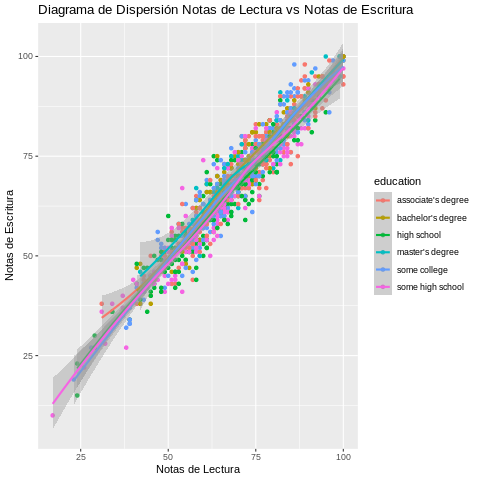

In [48]:
%%R
mdd2=ggplot(datos, aes(reading,writing, color=education)) +geom_point() + stat_smooth(method = "loess", formula = y ~ x) + labs(title="Diagrama de Dispersión Notas de Lectura vs Notas de Escritura")+ labs(x="Notas de Lectura", y="Notas de Escritura") 
mdd2

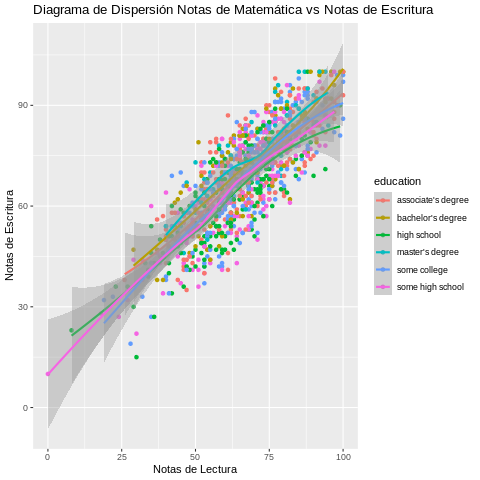

In [49]:
%%R
mdd3=ggplot(datos, aes(math,writing, color=education)) +geom_point() + stat_smooth(method = "loess", formula = y ~ x) + labs(title="Diagrama de Dispersión Notas de Matemática vs Notas de Escritura")+ labs(x="Notas de Lectura", y="Notas de Escritura") 
mdd3

Histogramas:

Histogramas para matematicas segun los 6 tipos de preparacion academica de los padres:

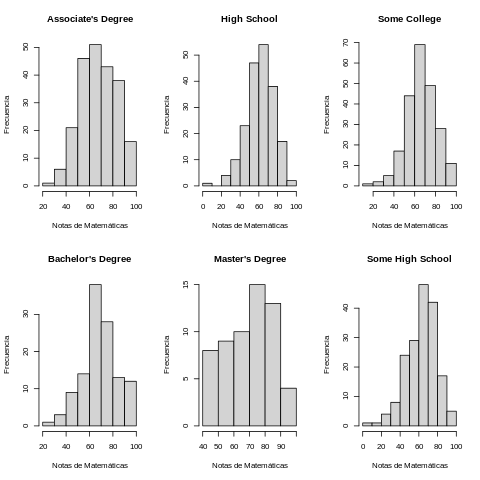

In [27]:
%%R
layout(matrix(c(1:6), nrow=2, byrow=FALSE))
hist(datos1$math, main="Associate's Degree", xlab="Notas de Matemáticas", ylab="Frecuencia")
hist(datos2$math, main="Bachelor's Degree", xlab="Notas de Matemáticas", ylab="Frecuencia")
hist(datos3$math, main="High School", xlab="Notas de Matemáticas", ylab="Frecuencia")
hist(datos4$math, main="Master's Degree", xlab="Notas de Matemáticas", ylab="Frecuencia")
hist(datos5$math, main="Some College", xlab="Notas de Matemáticas", ylab="Frecuencia")
hist(datos6$math, main="Some High School", xlab="Notas de Matemáticas", ylab="Frecuencia")

Histogramas para Lectura  segun los 6 tipos de preparacion academica de los padres:

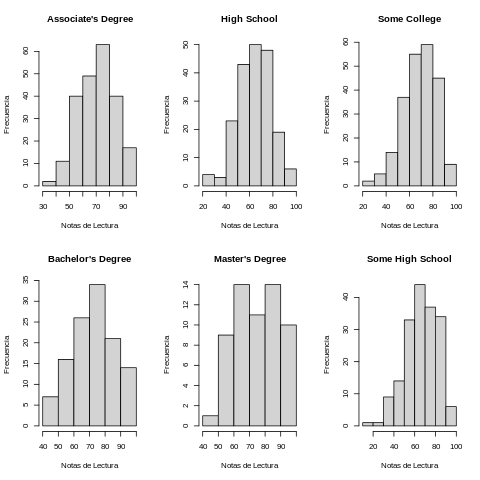

In [50]:
%%R
layout(matrix(c(1:6), nrow=2, byrow=FALSE))
hist(datos1$reading, main="Associate's Degree", xlab="Notas de Lectura", ylab="Frecuencia")
hist(datos2$reading, main="Bachelor's Degree", xlab="Notas de Lectura", ylab="Frecuencia")
hist(datos3$reading, main="High School", xlab="Notas de Lectura", ylab="Frecuencia")
hist(datos4$reading, main="Master's Degree", xlab="Notas de Lectura", ylab="Frecuencia")
hist(datos5$reading, main="Some College", xlab="Notas de Lectura", ylab="Frecuencia")
hist(datos6$reading, main="Some High School", xlab="Notas de Lectura", ylab="Frecuencia")

Histogramas para Escritura segun los 6 tipos de preparacion academica de los padres:


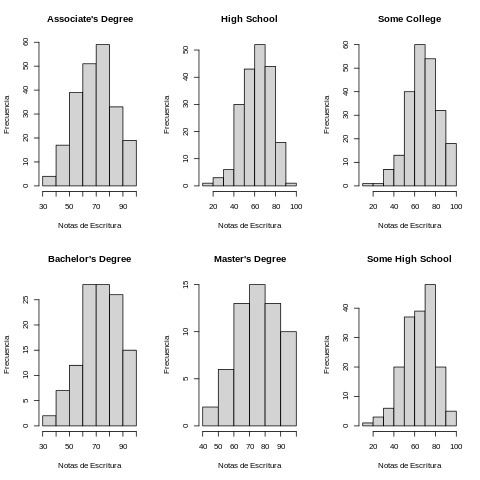

In [51]:
%%R
layout(matrix(c(1:6), nrow=2, byrow=FALSE))
hist(datos1$writing, main="Associate's Degree", xlab="Notas de Escritura", ylab="Frecuencia")
hist(datos2$writing, main="Bachelor's Degree", xlab="Notas de Escritura", ylab="Frecuencia")
hist(datos3$writing, main="High School", xlab="Notas de Escritura", ylab="Frecuencia")
hist(datos4$writing, main="Master's Degree", xlab="Notas de Escritura", ylab="Frecuencia")
hist(datos5$writing, main="Some College", xlab="Notas de Escritura", ylab="Frecuencia")
hist(datos6$writing, main="Some High School", xlab="Notas de Escritura", ylab="Frecuencia")

Mostrando todos los graficos en uno solo para visualizar en conjunto el nivel de educacion de los padres que corresponde a cada asignatura:

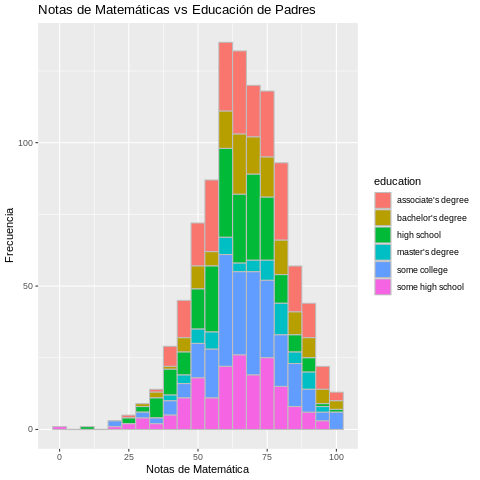

In [28]:
%%R
hist1=ggplot(data=datos, aes(math)) + geom_histogram(binwidth=5, color="gray", aes(fill=education))+ labs(title="Notas de Matemáticas vs Educación de Padres")+ labs(x="Notas de Matemática", y="Frecuencia") 
hist1

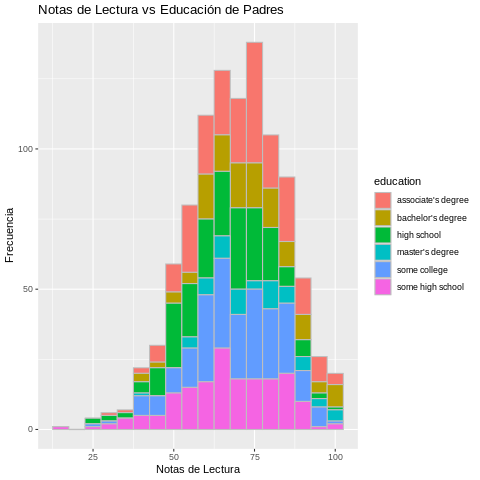

In [52]:
%%R
hist2=ggplot(data=datos, aes(reading)) + geom_histogram(binwidth=5, color="gray", aes(fill=education))+ labs(title="Notas de Lectura vs Educación de Padres")+ labs(x="Notas de Lectura", y="Frecuencia") 
hist2

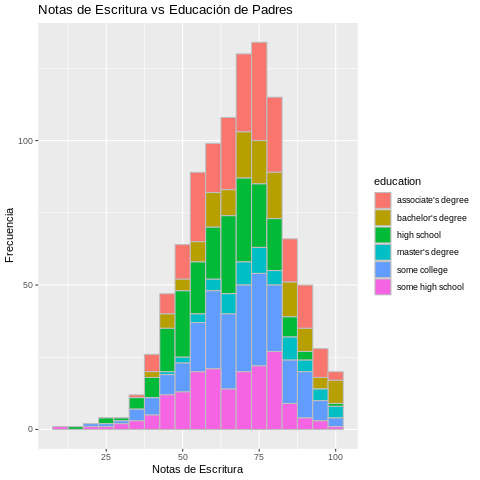

In [53]:
%%R
hist3=ggplot(data=datos, aes(writing)) + geom_histogram(binwidth=5, color="gray", aes(fill=education))+ labs(title="Notas de Escritura vs Educación de Padres")+ labs(x="Notas de Escritura", y="Frecuencia") 
hist3

Conclusiones sobre los histogramas:
De las notas por asignatura de los grupos separados por educacion de los padres se confirma que el grupo de estudiantes de padres con estudio de 'Master' posee una mayor proporcion de notas mas altas.

Diagramas de caja y bigotes:


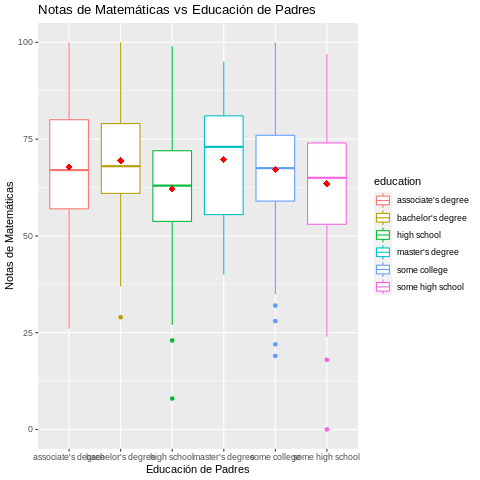

In [29]:
%%R
box1=ggplot(datos, aes(education, math, color = education)) + geom_boxplot() + labs(title="Notas de Matemáticas vs Educación de Padres")+ labs(x="Educación de Padres", y="Notas de Matemáticas") + stat_summary(fun.y=mean, geom="point", shape=18,size=3, color="red")
box1

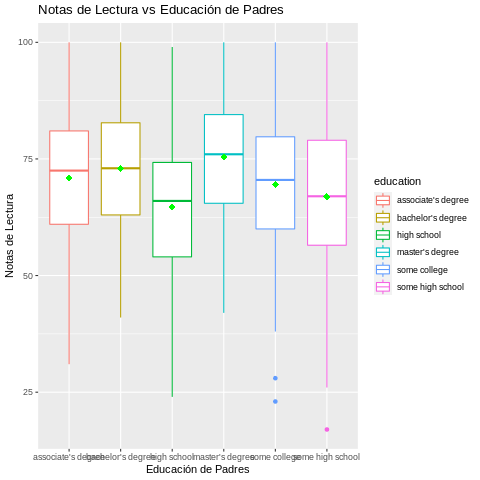

In [54]:
%%R
box2=ggplot(datos, aes(education, reading, color = education)) + geom_boxplot() + labs(title="Notas de Lectura vs Educación de Padres")+ labs(x="Educación de Padres", y="Notas de Lectura") + stat_summary(fun.y=mean, geom="point", shape=18,size=3, color="green")
box2

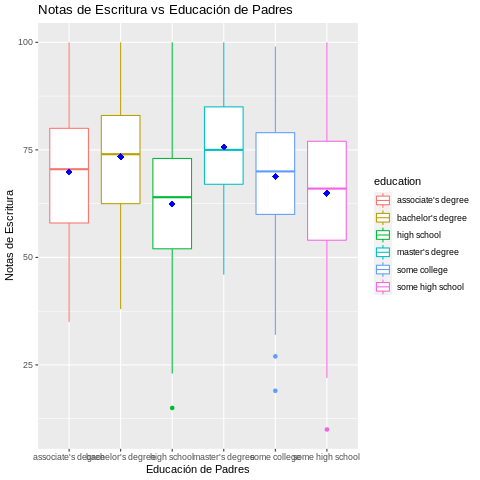

In [55]:
%%R 
box3=ggplot(datos, aes(education, writing, color = education)) + geom_boxplot() + labs(title="Notas de Escritura vs Educación de Padres")+ labs(x="Educación de Padres", y="Notas de Escritura") + stat_summary(fun.y=mean, geom="point", shape=18,size=3, color="blue")
box3

Conclusiones sobre los diagramas bloxplox, el grupo de estudiantes cuyos padres tienen grado de Master poseen media y primer cuartil mas alto con respecto a los demas grupos. Se puede observar un liderazgo en este grupo.

Grafica de normalidad para tendencias: En este tipo de grafico se pretende detectar que tan aproximado puede estar la distribucion a la normal.


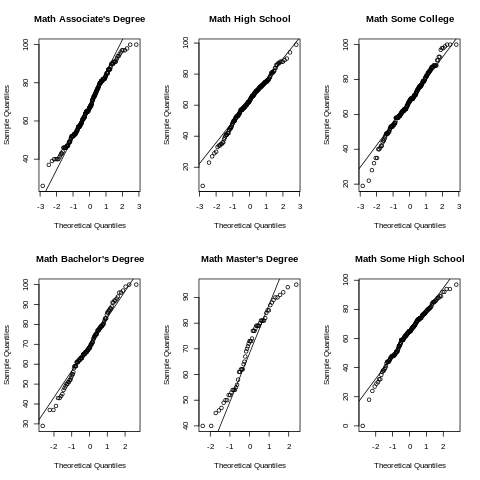

In [34]:
%%R
layout(matrix(c(1:6), nrow=2, byrow=FALSE))

qqnorm(datos1$math, main= "Math Associate's Degree")
qqline(datos1$math)

qqnorm(datos2$math, main= "Math Bachelor's Degree")
qqline(datos2$math)

qqnorm(datos3$math, main= "Math High School")
qqline(datos3$math)

qqnorm(datos4$math, main= "Math Master's Degree")
qqline(datos4$math)

qqnorm(datos5$math, main= "Math Some College")
qqline(datos5$math)

qqnorm(datos6$math, main= "Math Some High School")
qqline(datos6$math)

Observaciones: las pruebas de normalidad de todos los grupos por separado nos muestran que el nivel de educacion de los padres para todas las asignaturas bajo estudio pasan la prueba de normalidad de forma aceptable. Solo el caso de los estudiantes con padres que tienen grado de Master en matematicas presentan una ligera tendencia alejada de la normalidad.
